In [1]:
import pandas as pd

df = pd.read_csv('vehicles_us.csv')

print(df.shape)
print(df.columns)
print(df.info())
print(df.head())


(51525, 13)
Index(['price', 'model_year', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'transmission', 'type', 'paint_color', 'is_4wd',
       'date_posted', 'days_listed'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), obj

In [2]:
print(df.isnull().sum())

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64


In [3]:
df['model_year'] = df['model_year'].fillna(df['model_year'].median()).astype(int)
df['cylinders'] = df['cylinders'].fillna(df['cylinders'].mode()[0]).astype(int)
df['odometer'] = pd.to_numeric(df['odometer'], errors='coerce')
df['odometer'] = df['odometer'].fillna(df['odometer'].median())
df['paint_color'] = df['paint_color'].fillna('unknown')
df['is_4wd'] = df['is_4wd'].fillna(0).astype(int)

In [12]:
# 1. Definir percentiles para price y odometer
low_price = df['price'].quantile(0.005)
high_price = df['price'].quantile(0.995)

low_odo = df['odometer'].quantile(0.005)
high_odo = df['odometer'].quantile(0.995)

print(f"Límites razonables de precio según percentiles: {low_price:.2f} - {high_price:.2f}")
print(f"Límites razonables de odómetro según percentiles: {low_odo:.2f} - {high_odo:.2f}")

# 2. Guardar outliers de price y odometer
price_outliers = df[(df['price'] < low_price) | (df['price'] > high_price)]
odometer_outliers = df[(df['odometer'] < low_odo) | (df['odometer'] > high_odo)]

# 3. Filtrar solo los registros dentro de los rangos válidos para ambos
df = df[
    (df['price'] >= low_price) & (df['price'] <= high_price) &
    (df['odometer'] >= low_odo) & (df['odometer'] <= high_odo)
]

# 4. Registros se eliminados
print(f'Se eliminaron {price_outliers.shape[0]} registros por precio fuera del rango.')
print(f'Se eliminaron {odometer_outliers.shape[0]} registros por odómetro fuera del rango.')
print(f'Dataset final tiene {df.shape[0]} registros.')

Límites razonables de precio según percentiles: 850.00 - 43599.76
Límites razonables de odómetro según percentiles: 56.00 - 308000.00
Se eliminaron 498 registros por precio fuera del rango.
Se eliminaron 498 registros por odómetro fuera del rango.
Dataset final tiene 49024 registros.


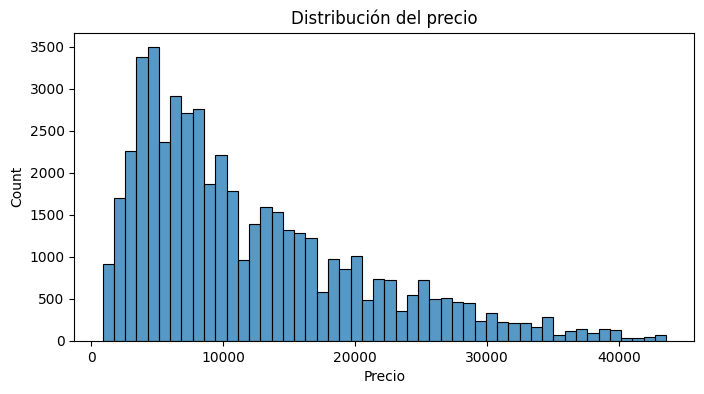

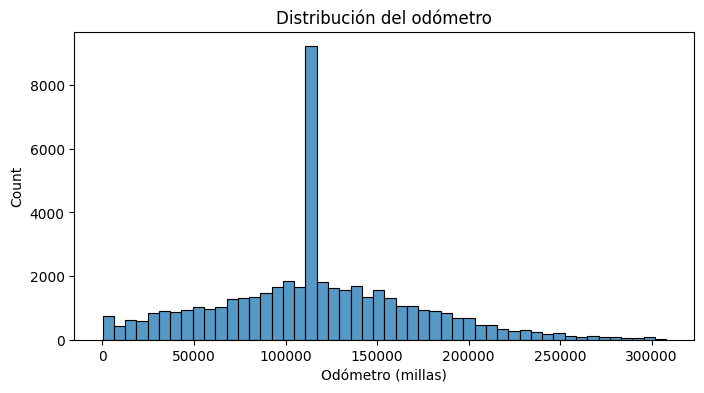

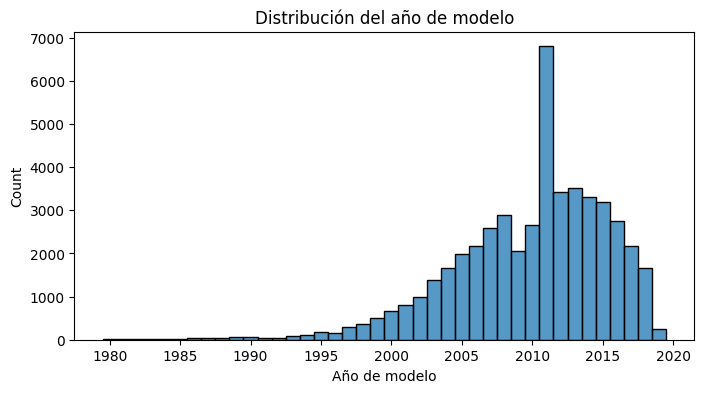

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Price
plt.figure(figsize=(8, 4))
sns.histplot(df['price'], bins=50)
plt.title('Distribución del precio')
plt.xlabel('Precio')
plt.show()

# Odometer
plt.figure(figsize=(8, 4))
sns.histplot(df['odometer'], bins=50)
plt.title('Distribución del odómetro')
plt.xlabel('Odómetro (millas)')
plt.show()

# Model year
plt.figure(figsize=(8, 4))
sns.histplot(df['model_year'], bins=40, discrete=True)
plt.title('Distribución del año de modelo')
plt.xlabel('Año de modelo')
plt.show()


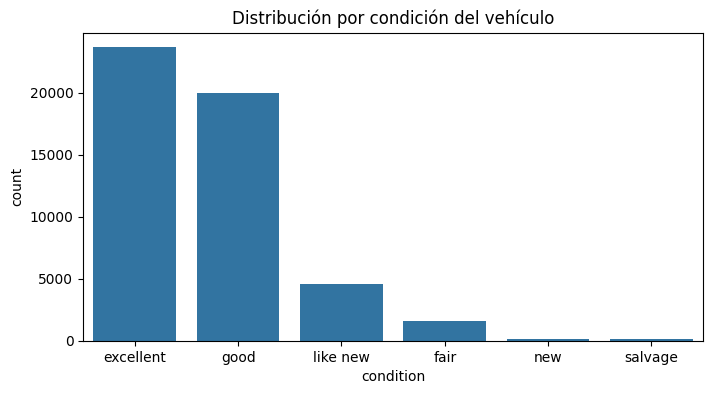

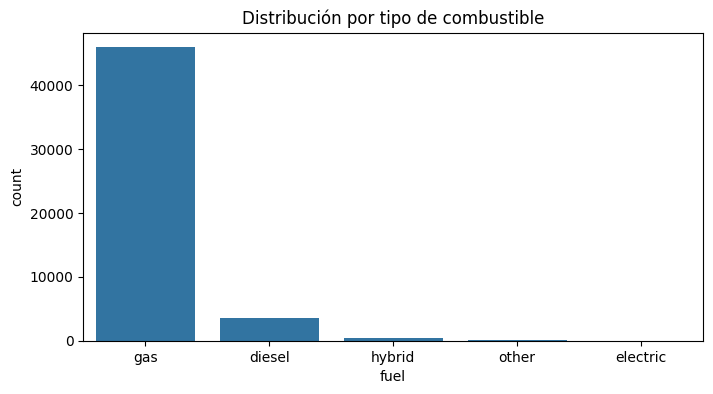

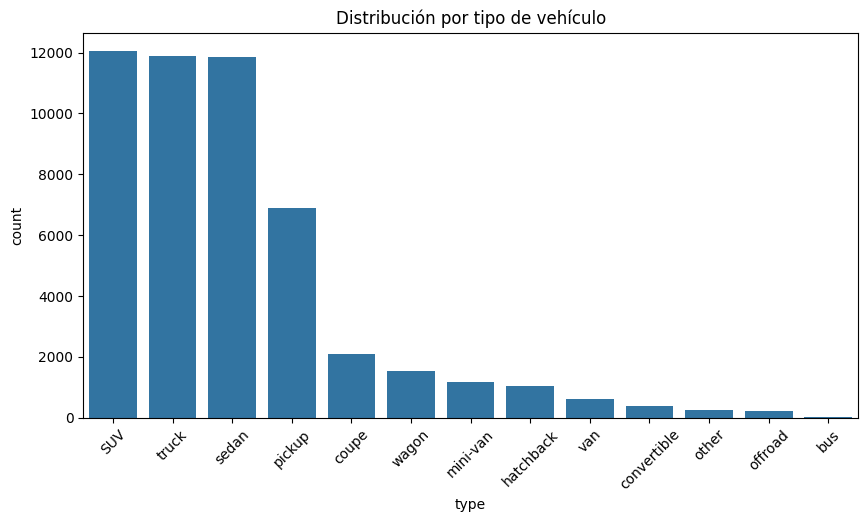

In [10]:
# Condition
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='condition', order=df['condition'].value_counts().index)
plt.title('Distribución por condición del vehículo')
plt.show()

# Fuel
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='fuel', order=df['fuel'].value_counts().index)
plt.title('Distribución por tipo de combustible')
plt.show()

# Type
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='type', order=df['type'].value_counts().index)
plt.title('Distribución por tipo de vehículo')
plt.xticks(rotation=45)
plt.show()


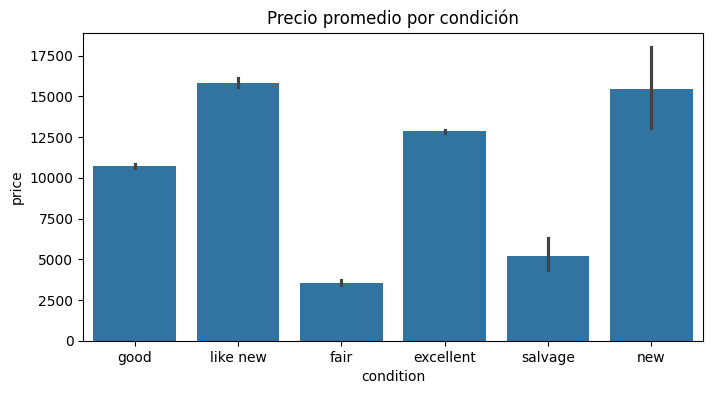

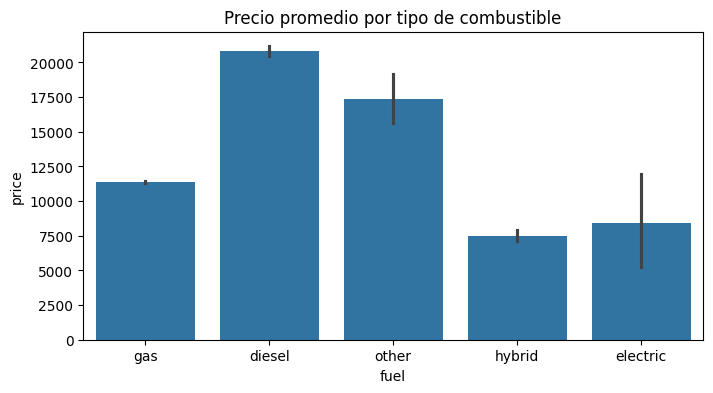

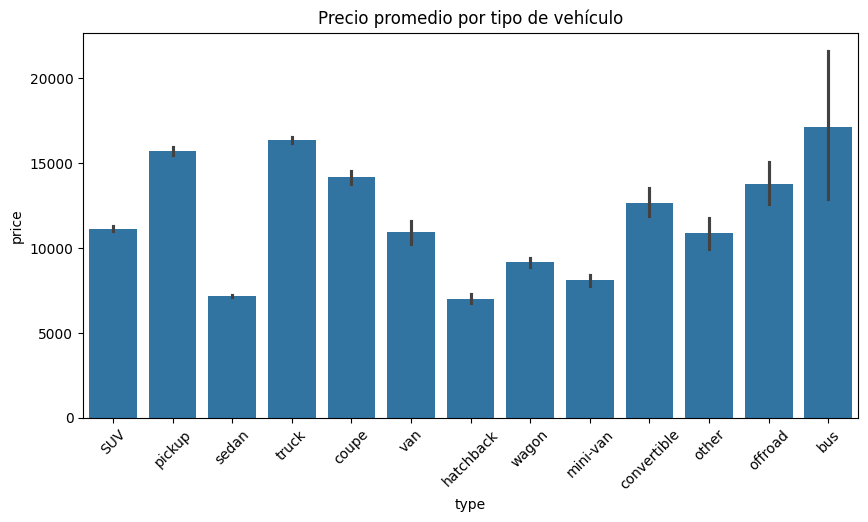

In [14]:
# Precio promedio por condición
plt.figure(figsize=(8, 4))
sns.barplot(data=df, x='condition', y='price', estimator='mean')
plt.title('Precio promedio por condición')
plt.show()

# Precio promedio por tipo de combustible
plt.figure(figsize=(8, 4))
sns.barplot(data=df, x='fuel', y='price', estimator='mean')
plt.title('Precio promedio por tipo de combustible')
plt.show()

# Precio promedio por tipo de vehículo
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='type', y='price', estimator='mean')
plt.title('Precio promedio por tipo de vehículo')
plt.xticks(rotation=45)
plt.show()

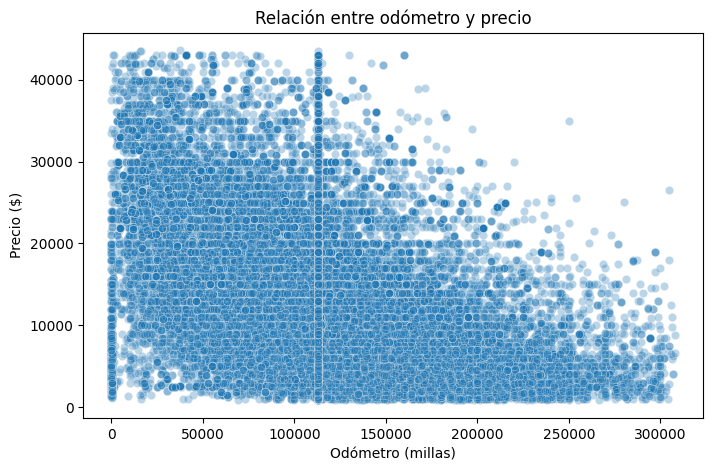

In [15]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='odometer', y='price', alpha=0.3)
plt.title('Relación entre odómetro y precio')
plt.xlabel('Odómetro (millas)')
plt.ylabel('Precio ($)')
plt.show()

In [16]:
cor = df[['price', 'odometer']].corr()
print(cor)

             price  odometer
price     1.000000 -0.465293
odometer -0.465293  1.000000


### Conclusiones del Análisis Exploratorio de Datos

1. **Limpieza de datos realizada:**
   - Se imputaron valores nulos en columnas clave como `model_year`, `cylinders`, `odometer`, `paint_color` e `is_4wd` usando estadísticas como la mediana o la moda.
   - Se eliminaron registros con años de fabricación anteriores a 1980, ya que eran pocos y presentaban inconsistencias.
   - Se filtraron outliers en las columnas `price` y `odometer` utilizando percentiles extremos (0.5% y 99.5%) para conservar únicamente los datos representativos del mercado de autos usados. Los registros filtrados fueron almacenados por separado para referencia futura.

2. **Distribuciones de variables:**
   - `price`: distribución sesgada a la derecha, con la mayoría de autos entre $5,000 y $15,000.
   - `odometer`: la mayoría de vehículos se concentran entre 60,000 y 150,000 millas, con una mediana de 113,000.
   - `model_year`: la mayor parte de los vehículos fueron fabricados entre 2005 y 2018.
   - Variables categóricas como `condition`, `fuel`, y `type` muestran concentraciones claras (ej. mayoría de autos en condición 'good' o 'excellent', la mayoría usa gasolina, y los sedanes son el tipo más frecuente).

3. **Relaciones entre variables:**
   - Se identificó una **correlación negativa moderada** entre el kilometraje (`odometer`) y el precio (`price`), con un coeficiente de aproximadamente **-0.47**. Esto indica que, en general, a mayor uso (más millas), menor es el valor del auto.
   - Esta relación es lógica y refuerza que el kilometraje es un factor determinante en el precio de reventa.

4. **Estado final del dataset:**
   - El conjunto de datos está limpio, sin valores nulos y sin registros extremos distorsionantes.
   - Se encuentra listo para análisis más avanzados, como visualizaciones comparativas, segmentación por tipo de vehículo o modelado predictivo.